4. Classification problem
In data_for_classification.csv you will find the data, where target variable is y, which should be categorized into two categories: 0 if y < 244, 1 if y >= 244. Your task is to make a classification model which predicts the category of y. Variables x_.. are possible predictors, but not all of them must be used in the model. You can freely choose the model you want to use, briefly explain why are you using this model, evaluate the prediction accuracy by calculating the percentage of True positive (both real and predicted category is 1) and True negative (both real and predicted category is 0) predictions. Find which predictors should be used in order to get the best prediction accuracy. This is real world data, the target variable is hard to predict, so do not expect very good model performance.


In [711]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.gridspec as gridspec
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score
import matplotlib.style as style
style.use('fivethirtyeight')
from pprint import pprint

from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings('ignore')
%matplotlib inline
style.use('fivethirtyeight')

In [712]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [713]:
df = pd.read_csv('/content/gdrive/MyDrive/Brolis/Task/data_for_classification.csv')

In [714]:
df[df.isna().any(axis=1)]

,y,x_m,x_h,x_l,x_p,x_f,x_a
112,840.0,8.789502,3.242412,0.209366,-0.091293,1.110506,NaN
192,293.0,7.633541,1.076465,-0.160571,0.238406,0.081292,NaN
308,19.0,6.719610,1.927840,-0.116618,-0.172418,-0.294193,NaN
325,109.0,7.697168,1.268023,-0.052945,-0.201735,-1.068219,NaN


In [715]:
df.duplicated().sum()

0

In [716]:
df.describe()

,y,x_m,x_h,x_l,x_p,x_f,x_a
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,341.000000
mean,202.726087,7.418440,1.271010,-0.017885,0.181755,0.177621,0.100774
std,334.657267,0.773922,0.643083,0.182132,0.283607,0.787671,2.346774
min,10.000000,4.058123,-0.608994,-0.710749,-0.512930,-2.012873,-12.321055
25%,37.000000,6.893680,0.843609,-0.117974,-0.014568,-0.379418,-0.945401
50%,88.000000,7.318857,1.169927,0.003153,0.149074,0.100482,0.261414
75%,202.000000,7.840882,1.609482,0.115102,0.349777,0.658724,1.272923
max,2000.000000,10.545773,3.732908,0.374394,1.510459,2.680834,7.125682


In [717]:
df = df.fillna(df.mean())

In [718]:
df[(df['y']>=244)]['y'].count(), df[(df['y']<244)]['y'].count()

(71, 274)

In [719]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,y,x_m,x_h,x_l,x_p,x_f,x_a
y,1.000000,0.434778,0.379541,-0.318678,0.073395,0.027967,-0.103698
x_m,0.434778,1.000000,0.771810,-0.580372,0.007089,-0.063168,-0.057465
x_h,0.379541,0.771810,1.000000,-0.261509,0.066342,0.074900,-0.070080
x_l,-0.318678,-0.580372,-0.261509,1.000000,-0.178252,-0.198092,0.072476
x_p,0.073395,0.007089,0.066342,-0.178252,1.000000,0.412192,-0.165968
x_f,0.027967,-0.063168,0.074900,-0.198092,0.412192,1.000000,0.015810
x_a,-0.103698,-0.057465,-0.070080,0.072476,-0.165968,0.015810,1.000000


In [720]:
# plt.scatter(df['x_m'], df['y'])
# plt.scatter(df['x_h'], df['y'])
# plt.scatter(df['x_l'], df['y'])
# plt.scatter(df['x_p'], df['y'])
# plt.scatter(df['x_f'], df['y'])
# plt.scatter(df['x_a'], df['y'])

(0.0, 500.0)

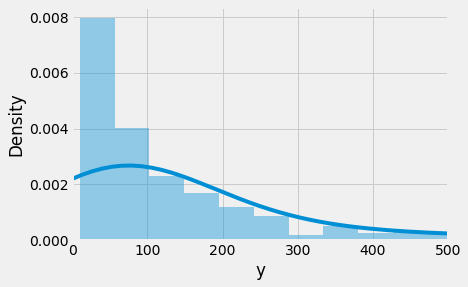

In [721]:
sns.distplot(df['y'])
plt.xlim(0, 500)

In [722]:
df.drop(['x_p', 'x_f', 'x_a'], axis=1, inplace=True)

In [723]:
df_test1 = df[(df['y']>=244)].sample(20) # 1
df_test0 = df[(df['y']<244)].sample(20) #0

In [724]:
df_test = pd.concat([df_test0, df_test1]).sample(frac=1)

In [725]:
already_present_index = df.index.intersection(df_test.index)
missing_index = df.index.difference(df_test.index)

df_train = pd.DataFrame().append(df.loc[missing_index, :])
df_train = df_train.reset_index(drop=True)

In [726]:
df_train[(df_train['y']>=244)]['y'].count(), df_train[(df_train['y']<244)]['y'].count()

(51, 254)

In [727]:
df_train['binary'] = df_train['y'].apply(lambda x: 1 if x >=244 else 0)

In [728]:
# features = ['x_m', 'x_h', 'x_l'] 
# target = df_train2['y']

features = ['x_m', 'x_h', 'x_l', 'y'] 
target = df_train['binary']

In [729]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(df_train[features], target)

(0.0, 500.0)

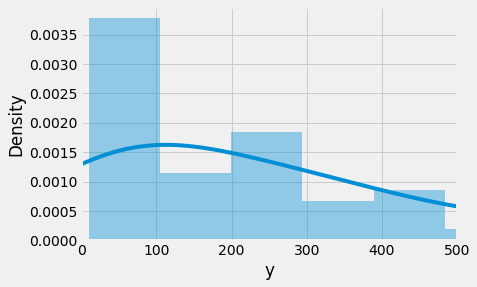

In [730]:
sns.distplot(X_sm['y'])
plt.xlim(0, 500)

In [731]:
df_new = pd.DataFrame(X_sm, columns=features)

In [732]:
df_new = df_new.sample(frac=1).reset_index(drop=True)

In [733]:
X_train = df_new[['x_m', 'x_h', 'x_l']]
y_train = df_new['y']

In [734]:
# scaler = StandardScaler()   

In [735]:
# X_train = scaler.fit_transform(df_train[features])

In [736]:
# value = np.log(max(df_train['y']))
# y_train = target.apply(lambda x: np.log(x)/value)

In [737]:
# # Randomized Search CV - parameter hypertuning for RF
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 15)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(1, 6, num = 6)]
# # max_depth.append(None)
# # # Minimum number of samples required to split a node
# # min_samples_split = [2, 5, 10]
# # # Minimum number of samples required at each leaf node
# # min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'bootstrap': bootstrap}
# pprint(random_grid)

In [738]:
# rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid, n_iter = 100, verbose=2, random_state=42, n_jobs = -1)

In [739]:
# rf_random.fit(X_train, y_train)

# rf_random.best_params_

In [740]:
random_forest = RandomForestRegressor(
 max_depth=2,
 max_features='auto',
 n_estimators=1728)

In [741]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, n_estimators=1728)

In [742]:
y_pred = random_forest.predict(df_test[['x_m', 'x_h', 'x_l']])

In [743]:
# y_preds = np.round(pd.Series(y_pred).apply(lambda x: np.exp(x*value)))

In [744]:
y_preds_binary = pd.Series(y_pred).apply(lambda x: 1 if x >= 244 else 0)

In [745]:
y_true = df_test['y'].apply(lambda x: 1 if x >=244 else 0)

In [746]:
accuracy_score(y_true, y_preds_binary)

0.75

In [747]:
# accuracy_score(df_test['y_binary_true'], df_test['y_binary'])

In [748]:
print(classification_report(y_true, y_preds_binary))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.78      0.70      0.74        20

    accuracy                           0.75        40
   macro avg       0.75      0.75      0.75        40
weighted avg       0.75      0.75      0.75        40



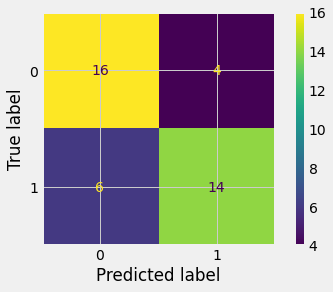

In [749]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_preds_binary))
disp.plot()